Found 1081 images belonging to 4 classes.
Found 269 images belonging to 4 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 666s 20s/step - accuracy: 0.5229 - loss: 1.7981 - val_accuracy: 0.9145 - val_loss: 0.2630
Epoch 2/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 6s 163ms/step - accuracy: 0.8864 - loss: 0.2787 - val_accuracy: 0.9628 - val_loss: 0.1470
Epoch 3/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 6s 183ms/step - accuracy: 0.9269 - loss: 0.1852 - val_accuracy: 0.9628 - val_loss: 0.0942
Epoch 4/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 6s 161ms/step - accuracy: 0.9443 - loss: 0.1455 - val_accuracy: 0.9554 - val_loss: 0.1119
Epoch 5/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 6s 175ms/step - accuracy: 0.9696 - loss: 0.0923 - val_accuracy: 0.9814 - val_loss: 0.0446
Epoch 6/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 10s 167ms/step - accuracy: 0.9723 - loss: 0.0647 - val_accuracy: 0.9888 - val_loss: 0.0317
Epoch 7/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 6s 189ms/step - accuracy: 0.9716 - loss: 0.0530 - val_accuracy: 0.9926 - val_loss: 0.0254
Epoch 8/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 6s 163ms/step - accuracy: 0.9886 - loss: 0.0358 - val_accuracy: 0

9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 176ms/step


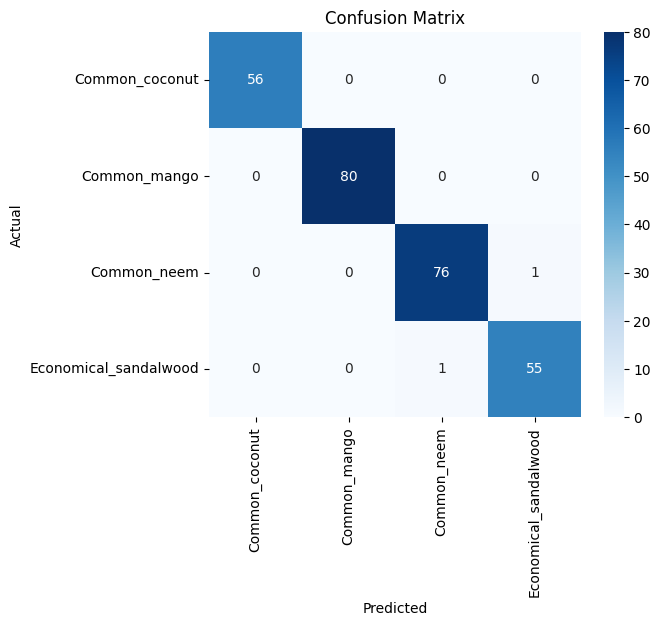

                       precision    recall  f1-score   support

       Common_coconut       1.00      1.00      1.00        56
         Common_mango       1.00      1.00      1.00        80
          Common_neem       0.99      0.99      0.99        77
Economical_sandalwood       0.98      0.98      0.98        56

             accuracy                           0.99       269
            macro avg       0.99      0.99      0.99       269
         weighted avg       0.99      0.99      0.99       269



Saving 79.jpg to 79.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 835ms/step


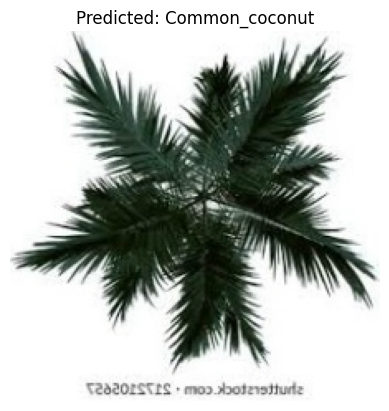

Predicted Class: Common_coconut


In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.metrics import confusion_matrix, classification_report
import cv2
from google.colab import files

# Define dataset path
train_dir = '/content/drive/MyDrive/Colab_Notebooks/Species/train'
test_dir = '/content/drive/MyDrive/Colab_Notebooks/Species/test'

# Data Preprocessing
img_size = (224, 224)
batch_size = 32

train_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
test_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(
    train_dir, target_size=img_size, batch_size=batch_size, class_mode='categorical'
)
test_data = test_datagen.flow_from_directory(
    test_dir, target_size=img_size, batch_size=batch_size, class_mode='categorical', shuffle=False
)

# Define CNN Model
model = keras.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(4, activation='softmax')
])

# Compile Model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train Model
epochs = 20
history = model.fit(train_data, validation_data=test_data, epochs=epochs)

# Save the Model
model.save('/content/drive/MyDrive/Colab_Notebooks/Species_classifier_model/tree_species_cnn.h5')

# Evaluate Model
y_true = test_data.classes
y_pred = model.predict(test_data)
y_pred_classes = np.argmax(y_pred, axis=1)

# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(6,5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=train_data.class_indices.keys(), yticklabels=train_data.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print(classification_report(y_true, y_pred_classes, target_names=train_data.class_indices.keys()))

# Function to classify a single image
def classify_image(model, image_path):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, img_size)
    img = img / 255.0  # Normalize
    img = np.expand_dims(img, axis=0)

    prediction = model.predict(img)
    class_idx = np.argmax(prediction)
    class_label = list(train_data.class_indices.keys())[class_idx]

    plt.imshow(cv2.imread(image_path))
    plt.axis('off')
    plt.title(f'Predicted: {class_label}')
    plt.show()
    return class_label

# Upload and Classify Image
uploaded = files.upload()
image_path = list(uploaded.keys())[0]
predicted_class = classify_image(model, image_path)
print(f'Predicted Class: {predicted_class}')


Saving 195.jpg to 195.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


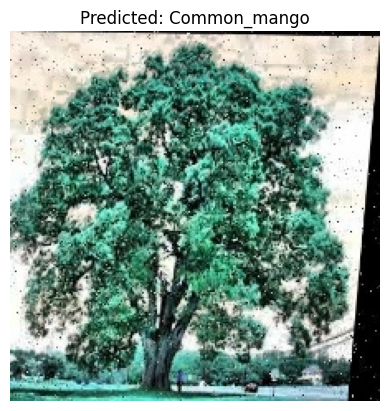

Predicted Class: Common_mango


In [2]:
def classify_image(model, image_path):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, img_size)
    img = img / 255.0  # Normalize
    img = np.expand_dims(img, axis=0)

    prediction = model.predict(img)
    class_idx = np.argmax(prediction)
    class_label = list(train_data.class_indices.keys())[class_idx]

    plt.imshow(cv2.imread(image_path))
    plt.axis('off')
    plt.title(f'Predicted: {class_label}')
    plt.show()
    return class_label

# Upload and Classify Image
uploaded = files.upload()
image_path = list(uploaded.keys())[0]
predicted_class = classify_image(model, image_path)
print(f'Predicted Class: {predicted_class}')

Saving 366.jpg to 366.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


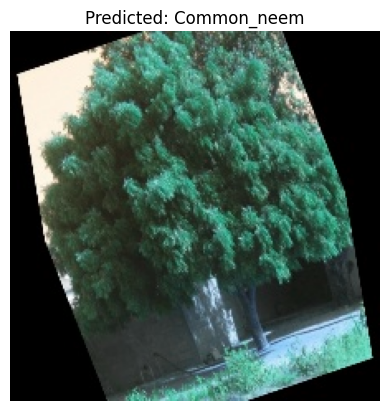

Predicted Class: Common_neem


In [3]:
def classify_image(model, image_path):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, img_size)
    img = img / 255.0  # Normalize
    img = np.expand_dims(img, axis=0)

    prediction = model.predict(img)
    class_idx = np.argmax(prediction)
    class_label = list(train_data.class_indices.keys())[class_idx]

    plt.imshow(cv2.imread(image_path))
    plt.axis('off')
    plt.title(f'Predicted: {class_label}')
    plt.show()
    return class_label

# Upload and Classify Image
uploaded = files.upload()
image_path = list(uploaded.keys())[0]
predicted_class = classify_image(model, image_path)
print(f'Predicted Class: {predicted_class}')

Saving 254.jpg to 254.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


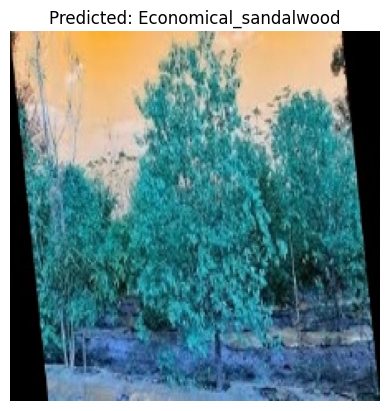

Predicted Class: Economical_sandalwood


In [4]:
def classify_image(model, image_path):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, img_size)
    img = img / 255.0  # Normalize
    img = np.expand_dims(img, axis=0)

    prediction = model.predict(img)
    class_idx = np.argmax(prediction)
    class_label = list(train_data.class_indices.keys())[class_idx]

    plt.imshow(cv2.imread(image_path))
    plt.axis('off')
    plt.title(f'Predicted: {class_label}')
    plt.show()
    return class_label

# Upload and Classify Image
uploaded = files.upload()
image_path = list(uploaded.keys())[0]
predicted_class = classify_image(model, image_path)
print(f'Predicted Class: {predicted_class}')